# Module 3 Project: Red wine quality

## Load libraries

In [1]:
#General libraries
import numpy as np
import pandas as pd
import scipy.stats
import math
import matplotlib.pyplot as plt

#sklearn
from sklearn import linear_model
from sklearn import tree
from sklearn import ensemble

from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.inspection import permutation_importance
from sklearn.ensemble import RandomForestRegressor


from statsmodels.api import OLS
!pip install dtreeviz
from dtreeviz.trees import dtreeviz 

from sklearn.cluster import KMeans

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


     |████████████████████████████████| 62 kB 630 kB/s 
  Created wheel for dtreeviz: filename=dtreeviz-1.3.2-py3-none-any.whl size=67936 sha256=44b2fbf0afaf01b3db4130ef69ac5d3a8dc25f3c47e757b4477487ccccd0cc31
  Stored in directory: /root/.cache/pip/wheels/9d/29/a1/f2ad20de79875e749330d5c6234fc5f517991fcaa23d7a3d0f
Successfully built dtreeviz


## Load the data
### Description:<br>
<b>Input variables (based on physicochemical tests):</b><br>
1 - fixed acidity<br>
2 - volatile acidity<br>
3 - citric acid<br>
4 - residual sugar<br>
5 - chlorides<br>
6 - free sulfur dioxide<br>
7 - total sulfur dioxide<br>
8 - density<br>
9 - pH<br>
10 - sulphates<br>
11 - alcohol<br>
<b>Output variable (based on sensory data):</b><br>
12 - quality (score between 0 and 10)<br>

In [2]:
from google.colab import drive
drive.mount('/content/drive')
data = pd.read_csv("/content/drive/MyDrive/CAS/6_Projekt_M3/winequality-red.csv")  
data
data.info()

X=data[["fixed acidity", "volatile acidity", "citric acid", "residual sugar", "chlorides", "free sulfur dioxide", "total sulfur dioxide", "density", "pH", "sulphates", "alcohol"]]
y=data["quality"]

Mounted at /content/drive
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


# Linear regression vs. Random forests

## Linear regression

In [62]:
# 1. make train/test split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=44)

# 2. fit the model
reg = linear_model.LinearRegression()
reg.fit(x_train, y_train)

##use another package for a helpful output...
OLS(y_train,x_train).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                quality   R-squared (uncentered):                   0.988
Model:                            OLS   Adj. R-squared (uncentered):              0.988
Method:                 Least Squares   F-statistic:                              9201.
Date:                Sun, 19 Dec 2021   Prob (F-statistic):                        0.00
Time:                        12:41:26   Log-Likelihood:                         -1233.0
No. Observations:                1279   AIC:                                      2488.
Df Residuals:                    1268   BIC:                                      2545.
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
fixed acidity           -0.0071      0.018     -0.391      0.696      -0.043       0.028
volatile acidity        -1.0051      0.134     -7.529      0.000      -1.267      -0.743
citric acid             -0.1783      0.162     -1.102      0.271      -0.496       0.139
residual sugar           0.0116      0.012      0.930      0.352      -0.013       0.036
chlorides               -2.1804      0.465     -4.690      0.000      -3.092      -1.268
free sulfur dioxide      0.0051      0.002      2.170      0.030       0.000       0.010
total sulfur dioxide    -0.0033      0.001     -4.185      0.000      -0.005      -0.002
density                  4.8800      0.712      6.850      0.000       3.482       6.278
pH                      -0.6421      0.182     -3.534      0.000      -0.998      -0.286
sulphates                1.0159      0.125      8.109      0.000       0.770       1.262
alcohol                  0.2980      0.019     15.827      0.000       0.261       0.335
==============================================================================
Omnibus:                       17.832   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               23.066
Skew:                          -0.179   Prob(JB):                     9.80e-06
Kurtosis:                       3.553   Cond. No.                     2.53e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.53e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [63]:
#3. Apply on test data
test_df = pd.DataFrame(y_test)
test_df["quality_lin_reg"] = reg.predict(x_test)

#4. Evaluate performance
print('test mse =', np.std(y_test - reg.predict(x_test)))

test mse = 0.6911053367099382


## Random forest regression

In [64]:
#1. Split the data set
#x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#2. Create regressor
#n_estimators = number of trees in the forest
#represents the depth of each tree in the forest
reg_forest = RandomForestRegressor(max_depth=30, random_state=0, n_estimators=500)

# 2. Fit the model
reg_forest.fit(x_train, y_train)
test_df["quality_forest_reg"] = reg_forest.predict(x_test)

#4. Evaluate performance
print('test mse =', np.std(y_test - reg_forest.predict(x_test)))

test_df

test mse = 0.6262384884171525


,quality,quality_lin_reg,quality_forest_reg
1297,6,6.2,6.0
1156,7,6.5,6.4
855,7,5.9,6.7
460,6,5.9,5.8
549,6,5.1,5.6
...,...,...,...
698,5,5.1,5.1
536,5,5.3,5.1
862,5,5.6,5.3
116,6,5.4,5.5


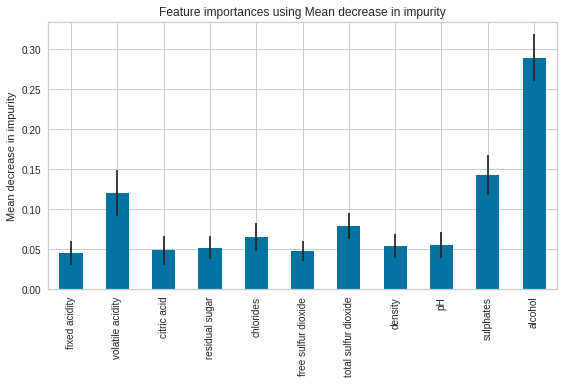

In [65]:
#5. Feature importance
importances = reg_forest.feature_importances_
feature_names = X.columns

forest_importances = pd.Series(importances, index=feature_names)
fig, ax = plt.subplots()
std = np.std([tree.feature_importances_ for tree in reg_forest.estimators_], axis=0)
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using Mean decrease in impurity")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

## Random forest classification

In [66]:
#Create classifier
class_forest = ensemble.RandomForestClassifier(max_depth=30, n_estimators=500)

#Fit
class_forest.fit(x_train, y_train)

test_df["quality_forest_reg"] = class_forest.predict(x_test)
print('test mse =', np.std(y_test - class_forest.predict(x_test)))

test_df

test mse = 0.6774189873150891


,quality,quality_lin_reg,quality_forest_reg
1297,6,6.2,6
1156,7,6.5,6
855,7,5.9,6
460,6,5.9,6
549,6,5.1,5
...,...,...,...
698,5,5.1,5
536,5,5.3,5
862,5,5.6,5
116,6,5.4,5


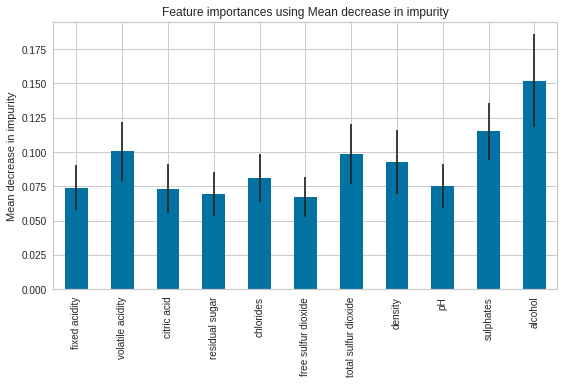

In [67]:
#Study feature importance
importances = class_forest.feature_importances_
feature_names = X.columns


forest_importances = pd.Series(importances, index=feature_names)
fig, ax = plt.subplots()
std = np.std([tree.feature_importances_ for tree in class_forest.estimators_], axis=0)
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using Mean decrease in impurity")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

# PCA

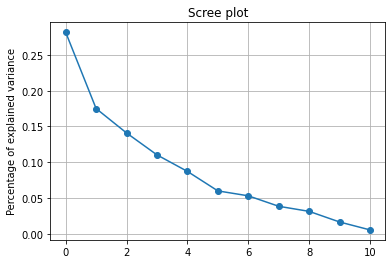

1.0


In [3]:
from sklearn import preprocessing

#Standardize the data
scaler = preprocessing.StandardScaler().fit(X)
X_standardized = scaler.transform(X)

#Check the scree plot
pca=PCA()
pca.fit(X_standardized)
plt.plot(pca.explained_variance_ratio_,'-o')
plt.title('Scree plot')
plt.ylabel('Percentage of explained variance')
plt.grid()
plt.show()
print(pca.explained_variance_ratio_.sum())

In [5]:
#Do PCA with 6 components
pca=PCA(n_components=6)
X_PCA = pd.DataFrame(pca.fit_transform(X_standardized), columns=["PC1", "PC2","PC3","PC4","PC5","PC6"])
X_PCA

,PC1,PC2,PC3,PC4,PC5,PC6
0,-1.619530,0.450950,-1.774454,0.043740,0.067014,-0.913921
1,-0.799170,1.856553,-0.911690,0.548066,-0.018392,0.929714
2,-0.748479,0.882039,-1.171394,0.411021,-0.043531,0.401473
3,2.357673,-0.269976,0.243489,-0.928450,-1.499149,-0.131017
4,-1.619530,0.450950,-1.774454,0.043740,0.067014,-0.913921
...,...,...,...,...,...,...
1594,-2.150500,0.814286,0.617063,0.407687,-0.240936,0.054835
1595,-2.214496,0.893101,1.807402,0.414003,0.119592,-0.674711
1596,-1.456129,0.311746,1.124239,0.491877,0.193716,-0.506410
1597,-2.270518,0.979791,0.627965,0.639770,0.067735,-0.860408


In [6]:
#Show correlation matrix between PCs and Variables
dataframes = [data, X_PCA]
merged_data=pd.concat(dataframes,axis=1)
corr=merged_data.corr()
pd.options.display.float_format = '{:,.1f}'.format
corr[["PC1", "PC2","PC3","PC4","PC5", "PC6"]].iloc[0:11]

,PC1,PC2,PC3,PC4,PC5,PC6
fixed acidity,0.9,-0.2,-0.2,-0.3,-0.1,0.1
volatile acidity,-0.4,0.4,-0.6,0.1,0.2,0.3
citric acid,0.8,-0.2,0.3,-0.1,-0.1,0.1
residual sugar,0.3,0.4,0.1,-0.4,0.7,0.0
chlorides,0.4,0.2,-0.1,0.7,0.2,0.2
free sulfur dioxide,-0.1,0.7,0.5,-0.0,-0.2,-0.0
total sulfur dioxide,0.0,0.8,0.4,-0.0,-0.2,0.1
density,0.7,0.3,-0.4,-0.2,0.2,-0.3
pH,-0.8,0.0,0.1,-0.0,0.3,-0.4
sulphates,0.4,-0.1,0.3,0.6,0.2,-0.3


In [7]:
#Compare prediction based on PCA to the classification forest above
pca_class_forest = ensemble.RandomForestClassifier(max_depth=30, n_estimators=500)
pca_x_train, pca_x_test, pca_y_train, pca_y_test = train_test_split(X_PCA, y, test_size=0.2, random_state=44)
pca_class_forest.fit(pca_x_train, pca_y_train)
pca_class_forest.predict(pca_x_test)
print('test mse =', np.std(pca_y_test - pca_class_forest.predict(pca_x_test)))

test mse = 0.7281987623581903


# Visualization with PCA and K-Means

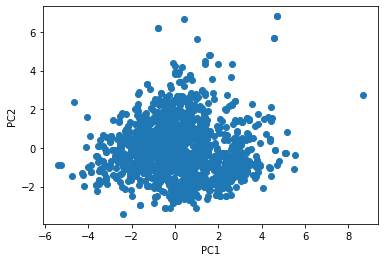

In [8]:
#PCA
pca=PCA(n_components=2)
X_PCA_2= pd.DataFrame(pca.fit_transform(X_standardized), columns=["PC1", "PC2"])

plt.scatter(x=X_PCA_2["PC1"], y=X_PCA_2["PC2"])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

In [73]:
#Show correlation matrix between PCs and Variables
dataframes_2 = [data, X_PCA_2]
merged_data_2=pd.concat(dataframes_2,axis=1)
corr_2=merged_data_2.corr()
pd.options.display.float_format = '{:,.1f}'.format
corr_2[["PC1", "PC2"]].iloc[0:11]

,PC1,PC2
fixed acidity,0.9,-0.2
volatile acidity,-0.4,0.4
citric acid,0.8,-0.2
residual sugar,0.3,0.4
chlorides,0.4,0.2
free sulfur dioxide,-0.1,0.7
total sulfur dioxide,0.0,0.8
density,0.7,0.3
pH,-0.8,0.0
sulphates,0.4,-0.1


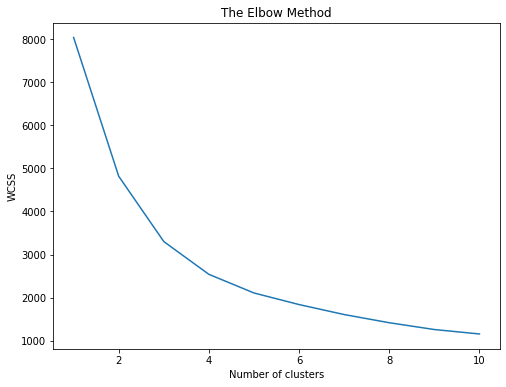

In [9]:
wcss = []  #Within-Cluster Sum of Square
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300, n_init=12, random_state=0)
    kmeans.fit(X_PCA_2)
    wcss.append(kmeans.inertia_)
f3, ax = plt.subplots(figsize=(8, 6))
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

Silhouetter Score: 0.335


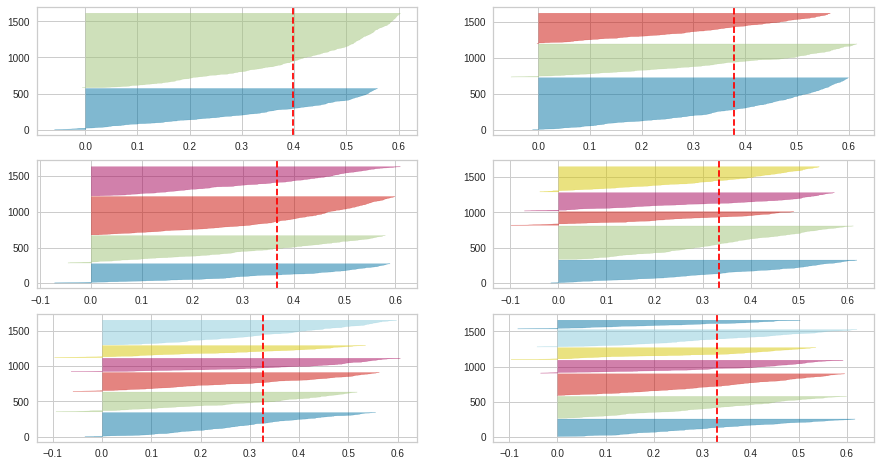

In [97]:
from sklearn.metrics import silhouette_samples, silhouette_score
score = silhouette_score(X_PCA_2, kmeans.labels_, metric='euclidean')
#
# Print the score
#
print('Silhouetter Score: %.3f' % score)

from yellowbrick.cluster import SilhouetteVisualizer

fig, ax = plt.subplots(3, 2, figsize=(15,8))
for i in [2, 3, 4, 5, 6, 7]:
    '''
    Create KMeans instance for different number of clusters
    '''
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(X_PCA_2)

In [81]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(X_PCA_2)

clusters = kmeans.predict(X_PCA_2)
#silhouette score
#elbow graph

array([4, 4, 4, ..., 4, 0, 2], dtype=int32)

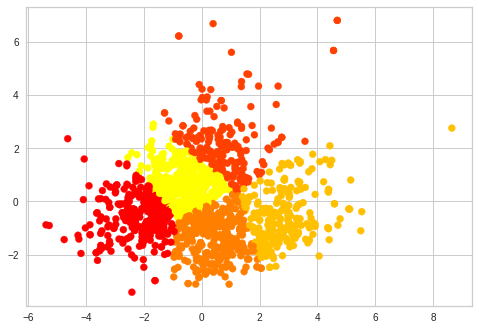

In [82]:
plt.scatter(x=X_PCA_2["PC1"], y=X_PCA_2["PC2"], c=clusters, cmap='autumn')

In [85]:
data["cluster"]=clusters
data
data.groupby('cluster').mean()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
cluster,,,,,,,,,,,,
0,6.7,0.6,0.1,2.1,0.1,13.2,31.6,1.0,3.5,0.6,11.0,5.6
1,8.6,0.6,0.3,3.8,0.1,28.6,101.0,1.0,3.3,0.6,9.7,5.2
2,8.7,0.4,0.4,2.3,0.1,10.2,26.1,1.0,3.3,0.7,11.0,6.1
3,11.1,0.4,0.5,2.8,0.1,11.5,35.9,1.0,3.1,0.8,10.4,5.9
4,7.6,0.6,0.2,2.3,0.1,18.8,54.3,1.0,3.4,0.6,9.9,5.4
